# Stores Locations Installation Problem 

In [1]:
from amplpy import AMPL, Environment
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [ ]:
# Ask for the AMPL folder path
amplUserFolder = input("path of the AMPL folder: ")

In [3]:
# Ask for the input data file
inputFilePath = input("path of the input file (.dat): ") or "inputs/minimart-I-100.dat"

path of the input file (.dat): 


In [4]:
# Create an AMPL instance
ampl = AMPL(Environment(amplUserFolder))

# Interpret the two files
ampl.read('minimart_sol.mod')
ampl.read_data(inputFilePath)

In [5]:
# Save parameters from the input file 
n = int(ampl.get_parameter('n').value()) #number of villages

coordX = ampl.get_parameter('Cx').get_values().toDict() #village coord x
coordY = ampl.get_parameter('Cy').get_values().toDict() #village coord y 
usable = ampl.get_parameter('usable').get_values().toDict() #village i can be used to build a store
dc = ampl.get_parameter('Dc').get_values().toDict() #cost to build a store in village i

rng = int(ampl.get_parameter('range').value()) 

distances = ampl.get_parameter('distance').get_values().to_dict() #distances from i to j
vc = ampl.get_parameter('Vc').value() #driving cost per kilometer 
fc = ampl.get_parameter('Fc').value() #fixed fee for each driver
capacity = int(ampl.get_parameter('capacity').value()) #capacity of each truck 

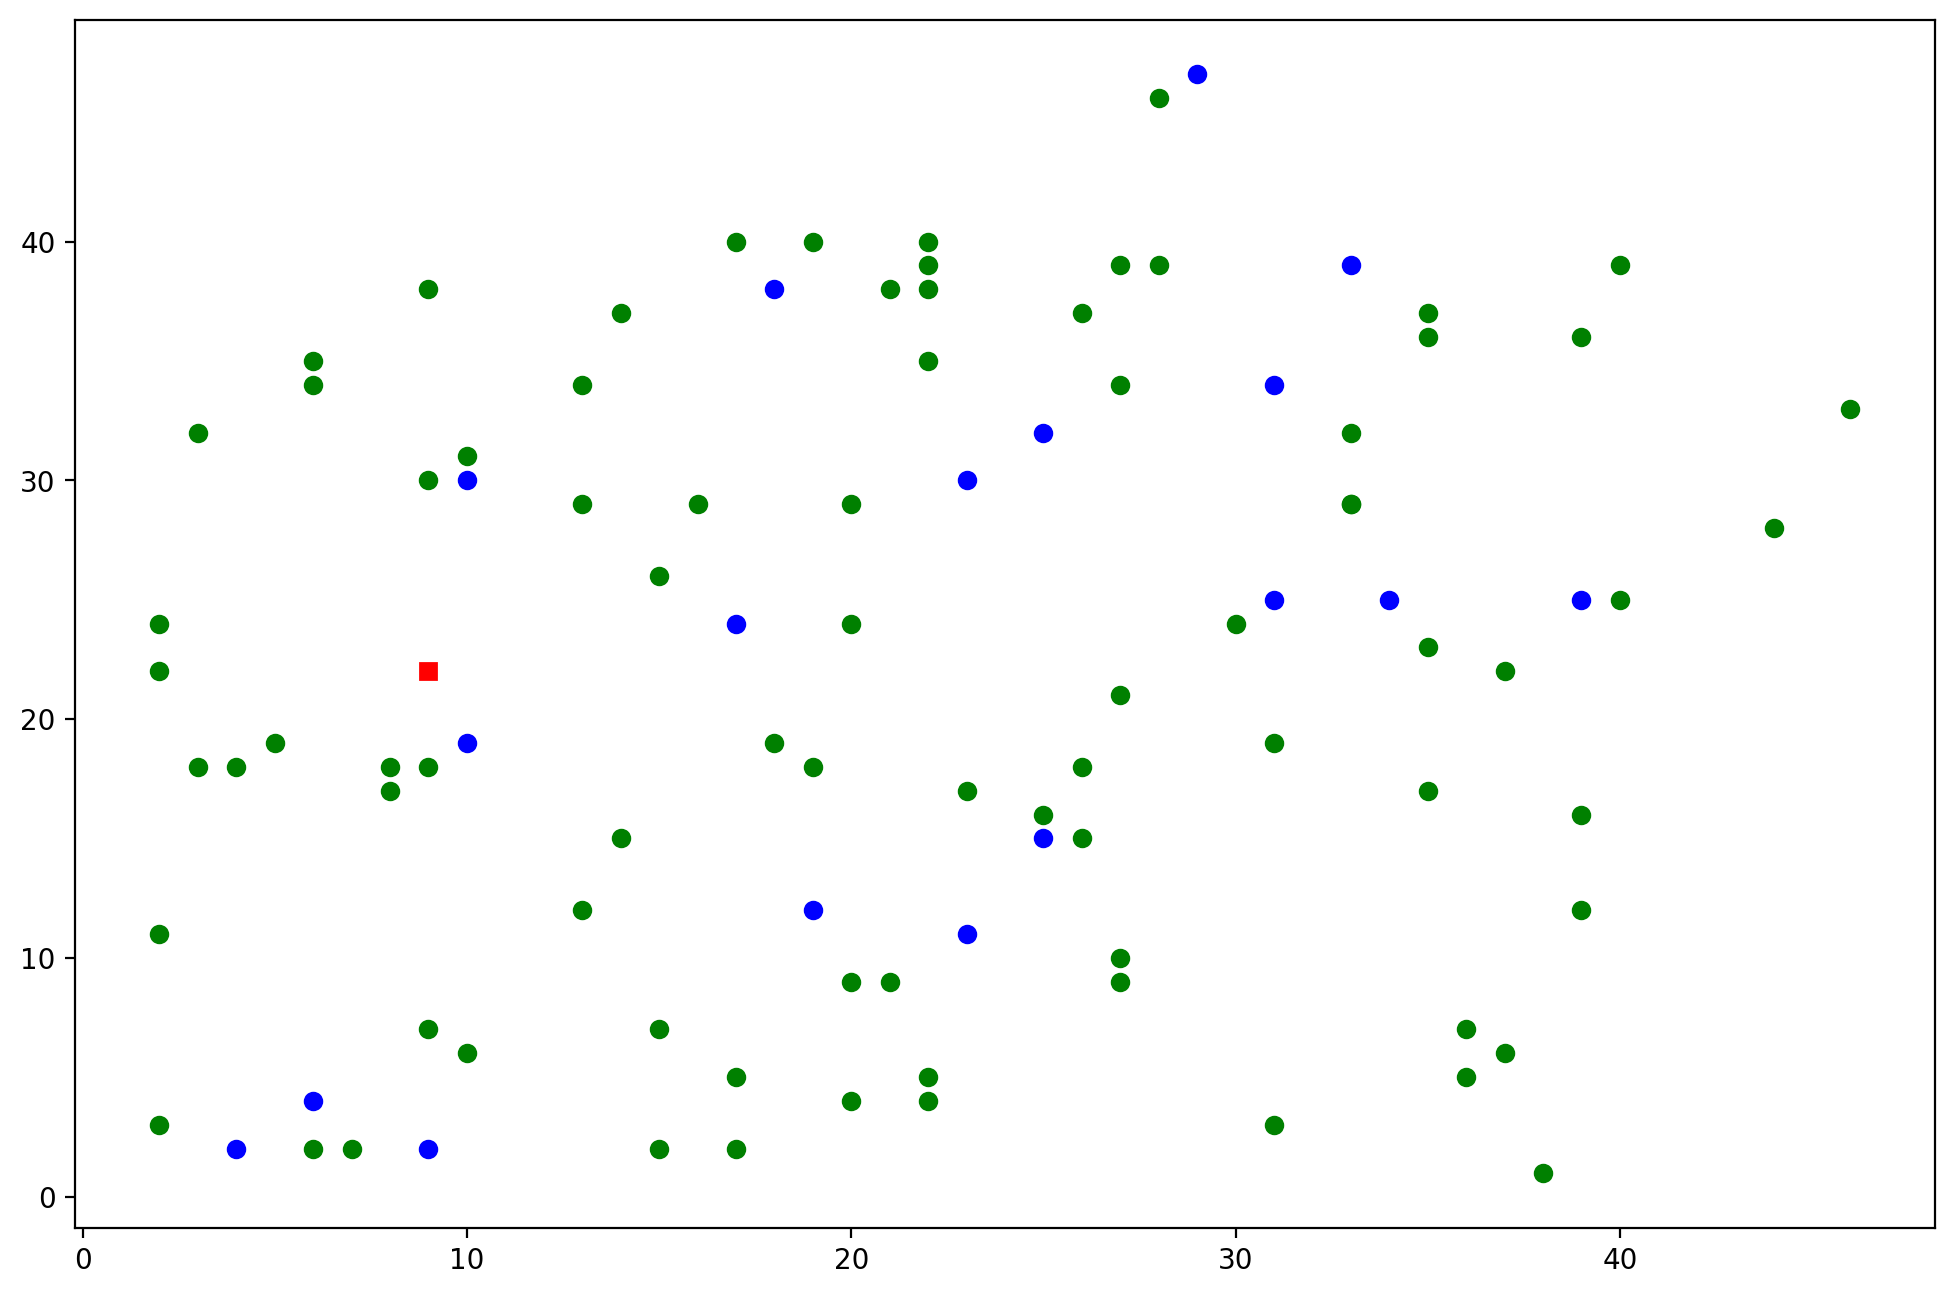

In [6]:
# Plot the region 
# red = depot, green = usable sites, blue = non usable sites
fig = plt.figure()
fig.set_size_inches(12,8)
fig.set_dpi(200)
plot = fig.add_subplot()
plot.plot(coordX.get(1), coordY.get(1), c='r',marker='s') #depot

usableCX = dict()
usableCY = dict()
nonUsableCX = dict()
nonUsableCY = dict()

for i in range(2,n+1):
    if usable.get(i)==1:
        usableCX.update({i: coordX.get(i)})
        usableCY.update({i: coordY.get(i)})
    else:    
        nonUsableCX.update({i: coordX.get(i)})
        nonUsableCY.update({i: coordY.get(i)})
        
plot.scatter(list(usableCX.values()), list(usableCY.values()), c='g') 
plot.scatter(list(nonUsableCX.values()), list(nonUsableCY.values()) , c='b') 

In [7]:
# Solve the store locations installation problem 
ampl.set_option('solver', amplUserFolder+"/cplex")
ampl.solve()

CPLEX 20.1.0.0: optimal integer solution; objective 178
0 MIP simplex iterations
0 branch-and-bound nodes


In [8]:
totalcost = ampl.get_objective('cost')
# Print it
print("Objective is:", totalcost.value())

Objective is: 178.0


In [9]:
y = ampl.get_variable('y').get_values().toDict()
ampl.close()

# Installed stores coordinates          
# Installed stores coordinates          
storesCoords = dict()

for i in range(1, len(y)+1):
    if y.get(i) == 1:
        storesCoords.update({i: (coordX.get(i), coordY.get(i))})
        
storesCoords

{1: (9.0, 22.0),
 5: (20.0, 29.0),
 6: (2.0, 24.0),
 8: (20.0, 24.0),
 10: (4.0, 18.0),
 13: (27.0, 39.0),
 14: (46.0, 33.0),
 16: (28.0, 46.0),
 17: (44.0, 28.0),
 18: (33.0, 32.0),
 19: (35.0, 23.0),
 20: (40.0, 39.0),
 21: (19.0, 40.0),
 23: (30.0, 24.0),
 26: (21.0, 9.0),
 27: (27.0, 10.0),
 28: (22.0, 38.0),
 31: (35.0, 17.0),
 36: (40.0, 25.0),
 37: (6.0, 34.0),
 38: (18.0, 19.0),
 40: (17.0, 5.0),
 43: (31.0, 19.0),
 45: (37.0, 6.0),
 50: (13.0, 12.0),
 56: (20.0, 4.0),
 59: (9.0, 30.0),
 60: (9.0, 38.0),
 61: (15.0, 26.0),
 62: (26.0, 18.0),
 64: (31.0, 3.0),
 68: (2.0, 3.0),
 69: (9.0, 18.0),
 73: (9.0, 7.0),
 75: (39.0, 12.0),
 76: (39.0, 16.0),
 82: (35.0, 37.0),
 84: (27.0, 34.0),
 85: (38.0, 1.0),
 87: (2.0, 11.0),
 96: (6.0, 2.0),
 97: (14.0, 37.0)}

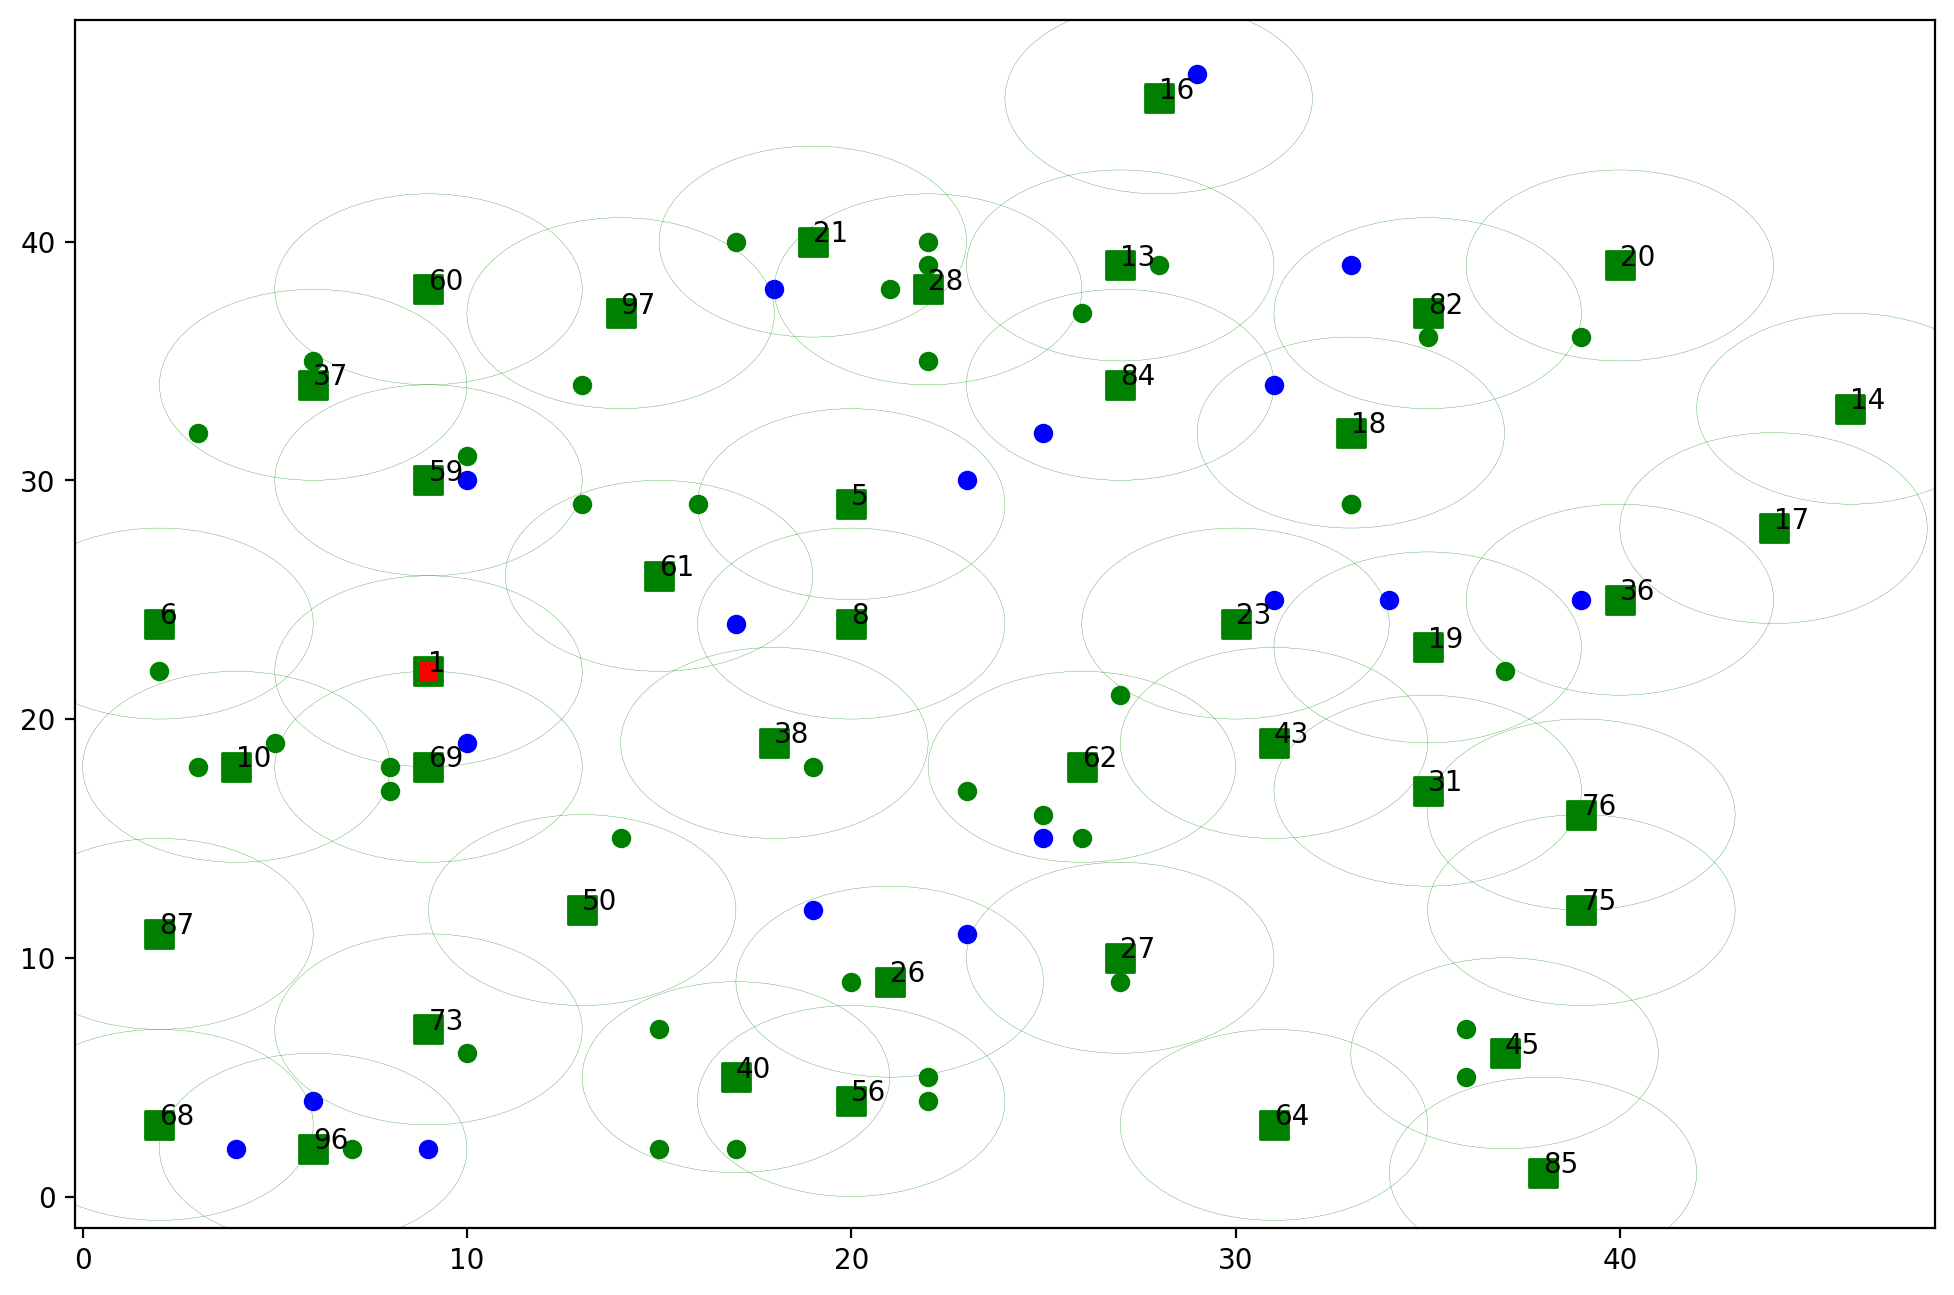

In [10]:
plot.scatter([c[0] for c in storesCoords.values()], [c[1] for c in storesCoords.values()], c='g', marker='s', s=100)
for c in storesCoords:
    plot.add_artist(plt.Circle(storesCoords.get(c), rng, color='g', fill=False, linewidth=0.1))
    plot.annotate(c, storesCoords.get(c))
fig

# Refurbishing Routes Problem

In [11]:
distances

{(1.0, 1.0): 0.0,
 (1.0, 2.0): 21.400934559032695,
 (1.0, 3.0): 5.0990195135927845,
 (1.0, 4.0): 7.0,
 (1.0, 5.0): 13.038404810405298,
 (1.0, 6.0): 7.280109889280518,
 (1.0, 7.0): 17.46424919657298,
 (1.0, 8.0): 11.180339887498949,
 (1.0, 9.0): 20.8806130178211,
 (1.0, 10.0): 6.4031242374328485,
 (1.0, 11.0): 32.01562118716424,
 (1.0, 12.0): 25.179356624028344,
 (1.0, 13.0): 24.758836806279895,
 (1.0, 14.0): 38.600518131237564,
 (1.0, 15.0): 25.0,
 (1.0, 16.0): 30.610455730027933,
 (1.0, 17.0): 35.510561809129406,
 (1.0, 18.0): 26.0,
 (1.0, 19.0): 26.019223662515376,
 (1.0, 20.0): 35.35533905932738,
 (1.0, 21.0): 20.591260281974,
 (1.0, 22.0): 14.866068747318506,
 (1.0, 23.0): 21.095023109728988,
 (1.0, 24.0): 25.0,
 (1.0, 25.0): 22.20360331117452,
 (1.0, 26.0): 17.69180601295413,
 (1.0, 27.0): 21.633307652783937,
 (1.0, 28.0): 20.615528128088304,
 (1.0, 29.0): 7.211102550927978,
 (1.0, 30.0): 18.24828759089466,
 (1.0, 31.0): 26.476404589747453,
 (1.0, 32.0): 3.1622776601683795,
 (1.0,

## Clarke-Wright Algorithm

In [12]:
def computeSavings():
    stores_indxs = storesCoords.keys()
    savings = [(distances.get((1,i))+distances.get((1,j))-distances.get((i,j)), i, j) for i in stores_indxs  for j in stores_indxs if i!=j and i>j]
    savings.sort(reverse=True)
    return savings         

In [13]:
savings = computeSavings()
savings

[(68.72591513323248, 17, 14),
 (65.47057581632637, 20, 14),
 (62.95503905953772, 85, 45),
 (61.655384813924286, 36, 17),
 (59.986836291800145, 82, 20),
 (59.74534113603244, 36, 14),
 (59.16120095773715, 20, 17),
 (58.2168936832405, 76, 75),
 (57.59380139815307, 85, 64),
 (57.547252274541236, 75, 45),
 (56.91248026012521, 82, 14),
 (56.38244316443284, 85, 75),
 (54.60971076819209, 64, 45),
 (53.10467889068612, 76, 17),
 (52.9474160456865, 76, 31),
 (52.79930178737881, 82, 17),
 (52.683554948214166, 76, 36),
 (52.64510904756534, 76, 45),
 (52.50016206412225, 36, 20),
 (52.07335079990551, 20, 16),
 (51.778881860175744, 36, 19),
 (51.696056953998394, 75, 31),
 (51.56211332083227, 18, 14),
 (51.45584412271571, 20, 18),
 (51.365848283120116, 85, 76),
 (51.234155330657785, 19, 17),
 (50.80985890194405, 76, 14),
 (50.63149723247277, 82, 18),
 (50.370283796572984, 75, 17),
 (49.80586189840978, 18, 17),
 (49.75367304643443, 19, 14),
 (49.72919479607337, 75, 36),
 (49.225363518643825, 82, 16),
 (

In [14]:
routes = [[1,i,1] for i in storesCoords.keys() if i>1]
routes

[[1, 5, 1],
 [1, 6, 1],
 [1, 8, 1],
 [1, 10, 1],
 [1, 13, 1],
 [1, 14, 1],
 [1, 16, 1],
 [1, 17, 1],
 [1, 18, 1],
 [1, 19, 1],
 [1, 20, 1],
 [1, 21, 1],
 [1, 23, 1],
 [1, 26, 1],
 [1, 27, 1],
 [1, 28, 1],
 [1, 31, 1],
 [1, 36, 1],
 [1, 37, 1],
 [1, 38, 1],
 [1, 40, 1],
 [1, 43, 1],
 [1, 45, 1],
 [1, 50, 1],
 [1, 56, 1],
 [1, 59, 1],
 [1, 60, 1],
 [1, 61, 1],
 [1, 62, 1],
 [1, 64, 1],
 [1, 68, 1],
 [1, 69, 1],
 [1, 73, 1],
 [1, 75, 1],
 [1, 76, 1],
 [1, 82, 1],
 [1, 84, 1],
 [1, 85, 1],
 [1, 87, 1],
 [1, 96, 1],
 [1, 97, 1]]

In [15]:
def findRoutesPassingThrough(s1, s2):
    r1 = None
    r2 = None
    for route in routes:
        if r1 is not None and r2 is not None:
            break
        if route[1] == s1:
            route.reverse()
            r1 = route
            continue
        elif route[-2] == s1:
            r1 = route
            continue
        if route[1] == s2:
            r2 = route
            continue
        elif route[-2] == s2:
            route.reverse()
            r2 = route
            continue
    return r1, r2

In [16]:
def mergeRoutes(r1, s1, r2):
    r1_c = list(r1)
    r2_c = list(r2)
    del r1_c[-2:]
    del r2_c[:2]
    return r1_c+s1+r2_c

In [17]:
def clarke_wright():
    while(len(savings) > 0):
        currSaving = savings.pop(0)
        r1, r2 = findRoutesPassingThrough(currSaving[1], currSaving[2])
        if r1 is not None and r2 is not None:
            newRoute = mergeRoutes(r1, [currSaving[1], currSaving[2]], r2)
            if len(newRoute) - 2 <= capacity: #excluding the store at location 1 (depot)
                routes.remove(r1)
                routes.remove(r2)
                routes.insert(0, newRoute)
    

In [18]:
clarke_wright()
routes

[[1, 61, 5, 84, 28, 21, 97, 60, 37, 59, 6, 1],
 [1, 38, 50, 26, 56, 40, 73, 96, 68, 87, 10, 1],
 [1, 27, 64, 85, 45, 75, 76, 31, 43, 62, 8, 1],
 [1, 23, 19, 36, 17, 14, 20, 82, 18, 16, 13, 1],
 [1, 69, 1]]

In [21]:
colors = iter(cm.rainbow(np.linspace(0, 1, len(routes))))
for route in routes:
   color = next(colors)
   for i, j in zip(route, route[1:]):
        x_val = [storesCoords.get(i)[0], storesCoords.get(j)[0]]
        y_val = [storesCoords.get(i)[1], storesCoords.get(j)[1]]
        plot.plot(x_val, y_val, lw=1, color=color)    

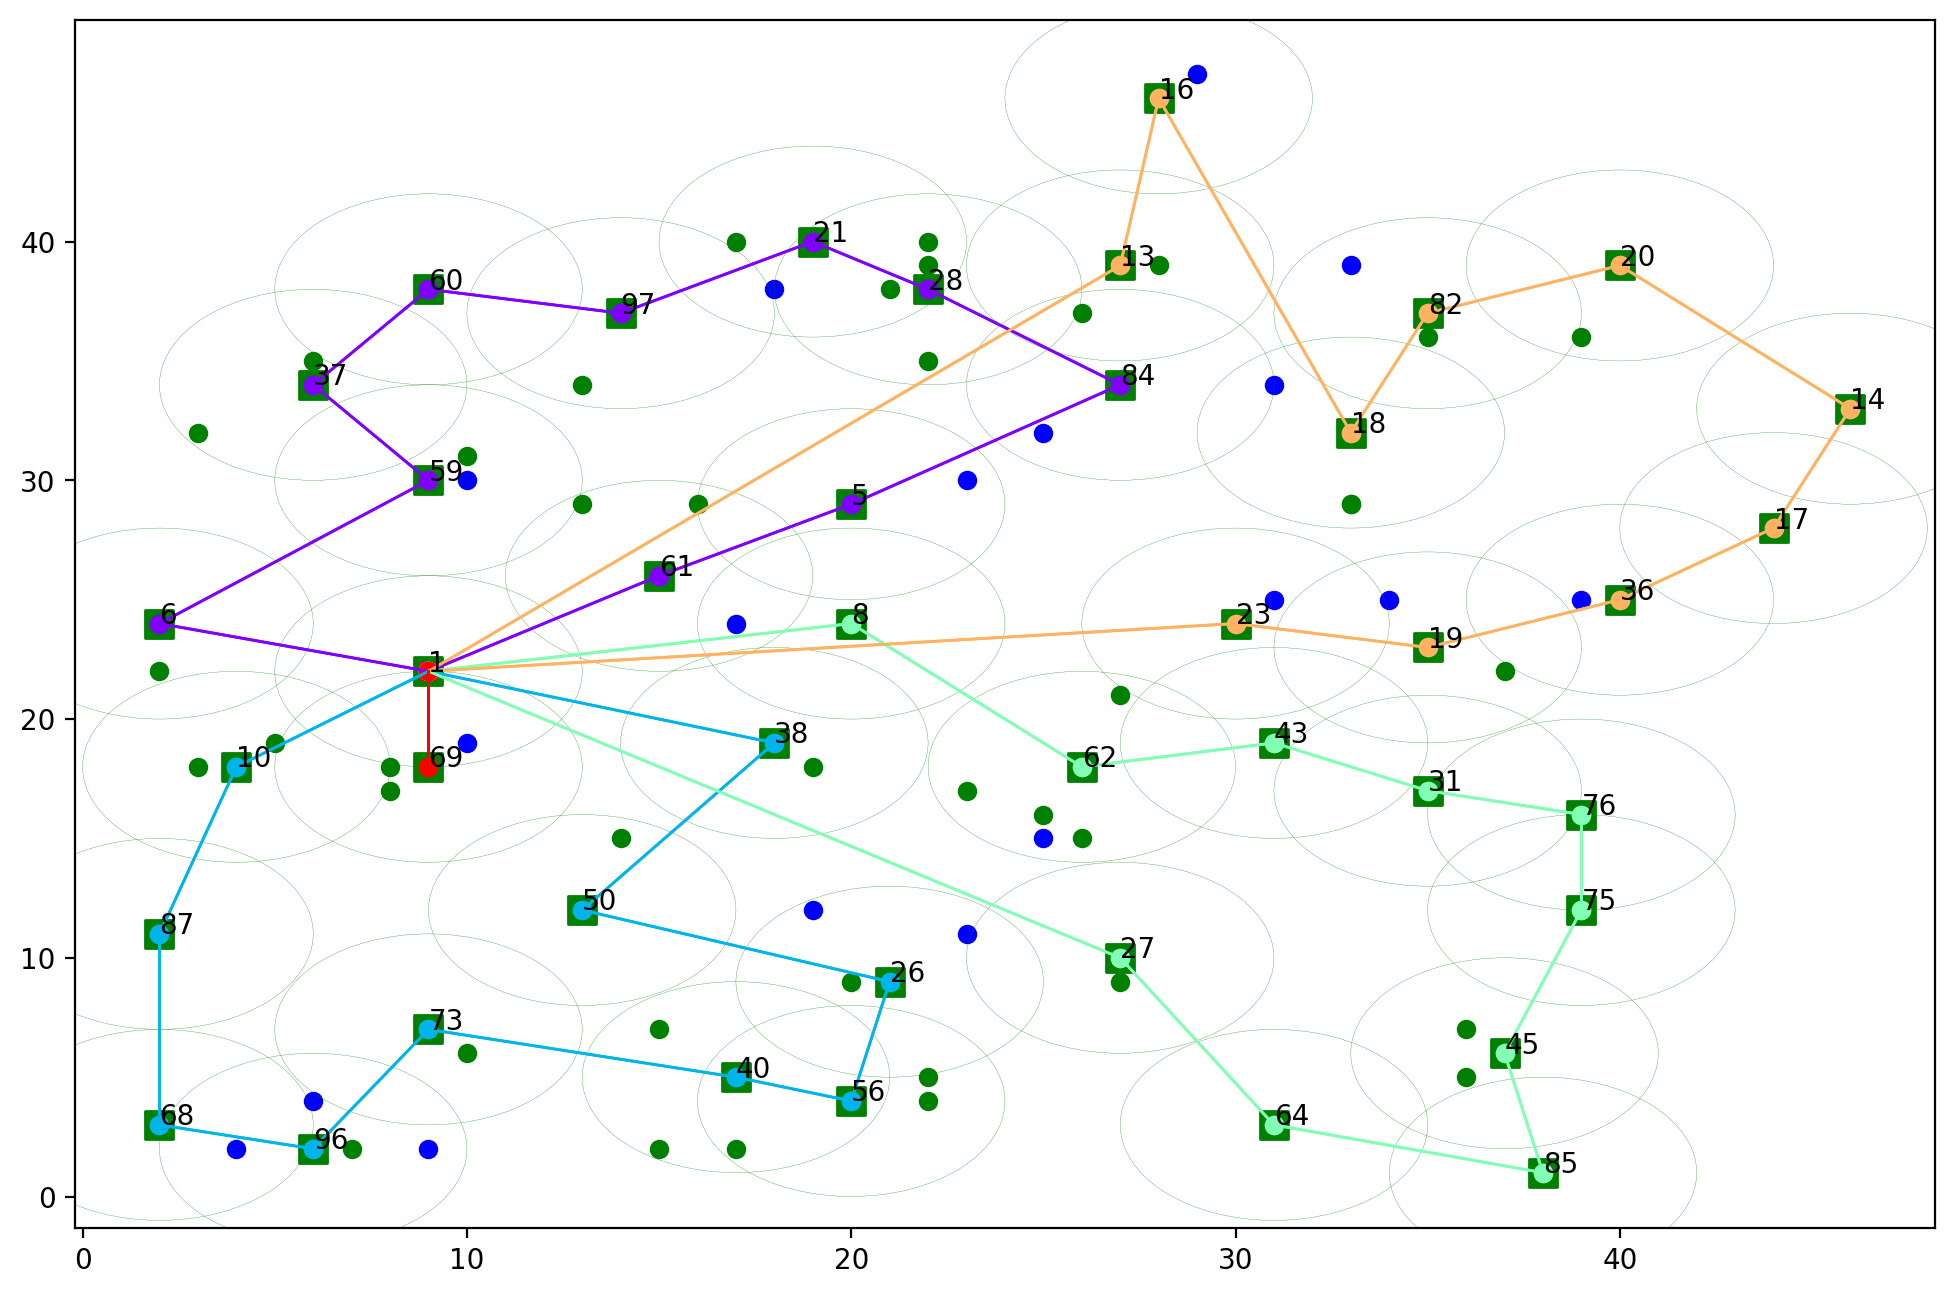

In [22]:
plot.get_figure()

## TODO : Formatted Output (costs...)